---
title: "Régression linéaire simple avec Python"
author: "Jason Suárez"
date: "2024-01-30"
categories: ["Data Science", "Python"]
image: "image.png"
draft: true
---

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from utils import *


In [19]:
dataset = pd.read_csv('data/train.csv')
dataset.head()

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984


In [20]:
dataset.describe()


,x,y
count,700.000000,699.000000
mean,54.985939,49.939869
std,134.681703,29.109217
min,0.000000,-3.839981
25%,25.000000,24.929968
50%,49.000000,48.973020
75%,75.000000,74.929911
max,3530.157369,108.871618


In [21]:
dataset.dropna(inplace=True)

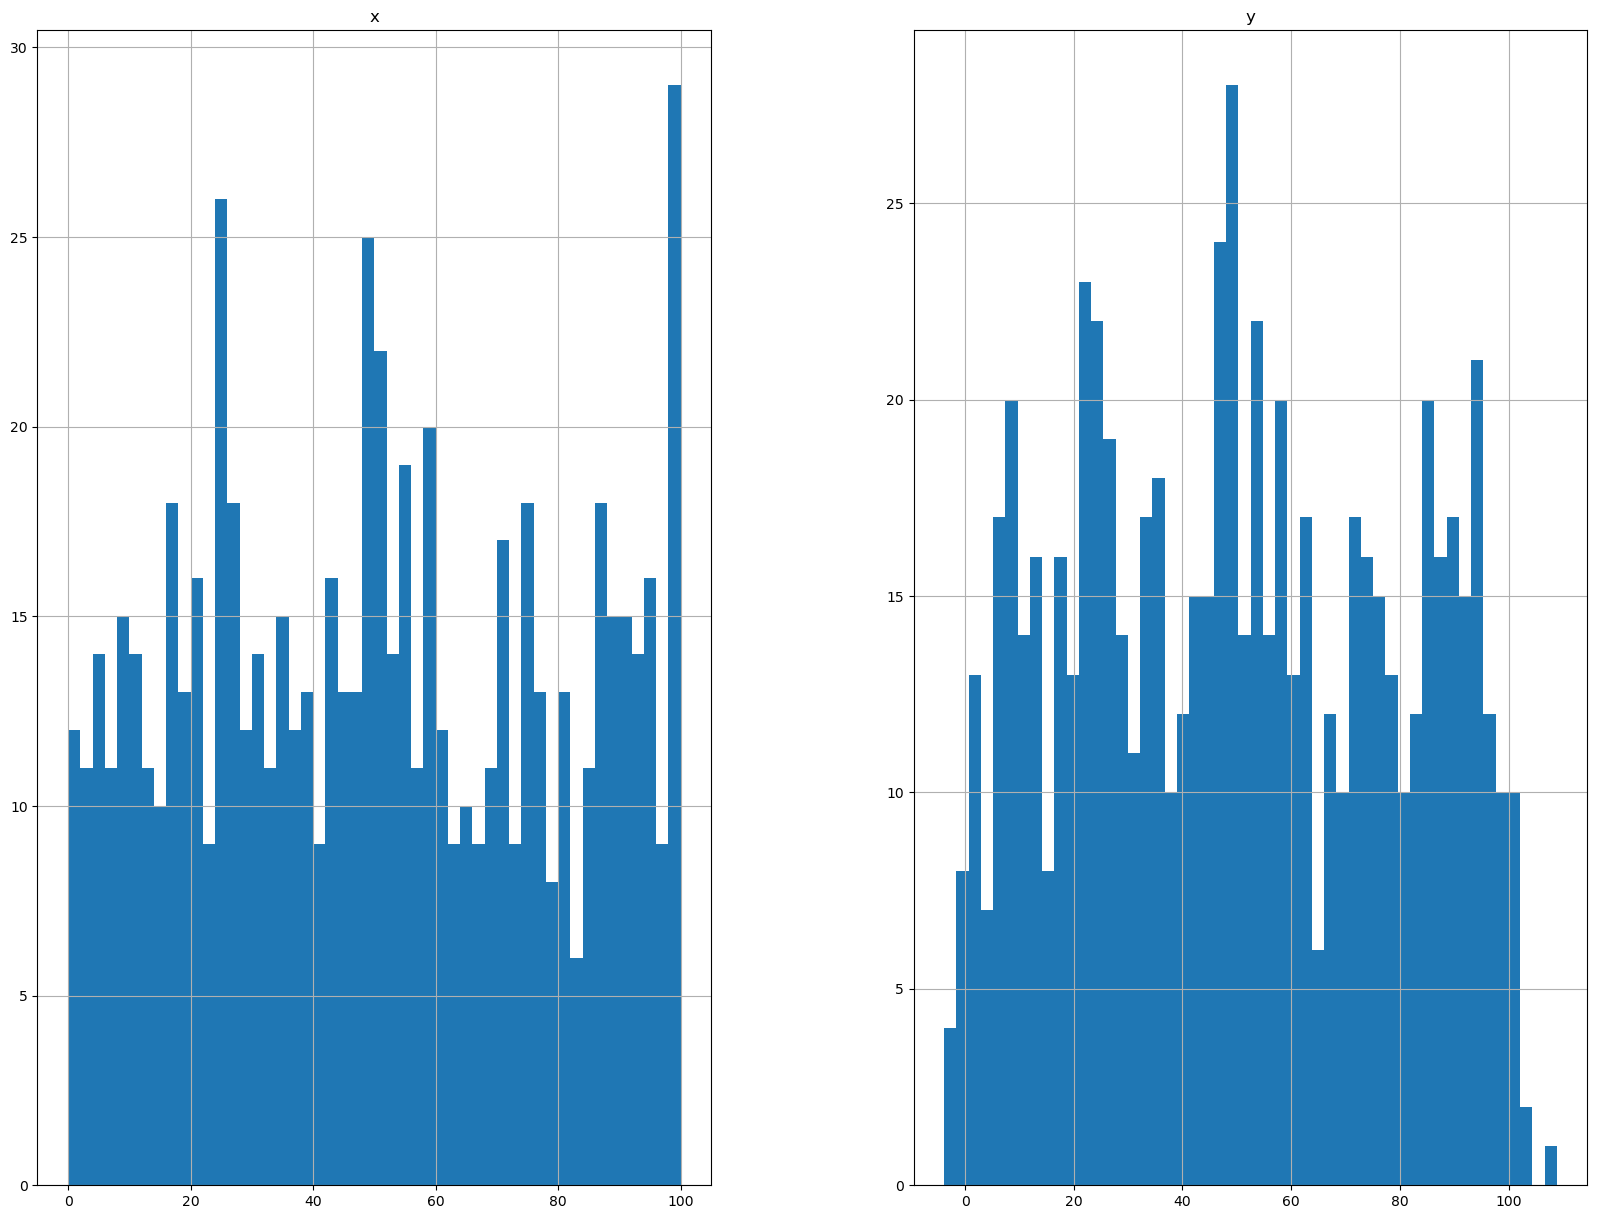

In [22]:
# Plotting the distribution of the data
dataset.hist(bins=50, figsize=(20,15))
plt.show()


In [23]:
# Plotting the correlation matrix
corr_matrix = dataset.corr()
corr_matrix['y'].sort_values(ascending=False)

y    1.00000
x    0.99534
Name: y, dtype: float64

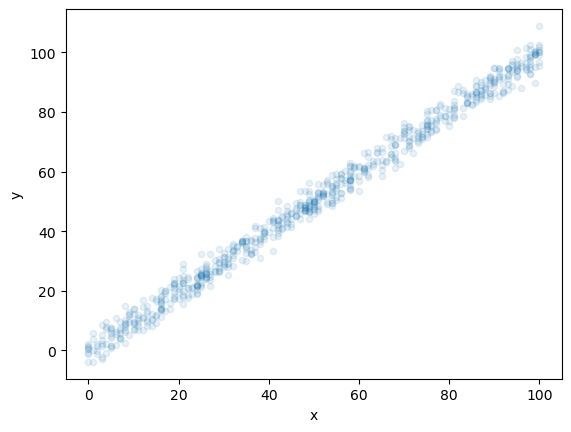

In [24]:
# Scatter plot of the dataset to see the points distribution
dataset.plot(kind='scatter', x='x', y='y', alpha=0.1)
plt.show()



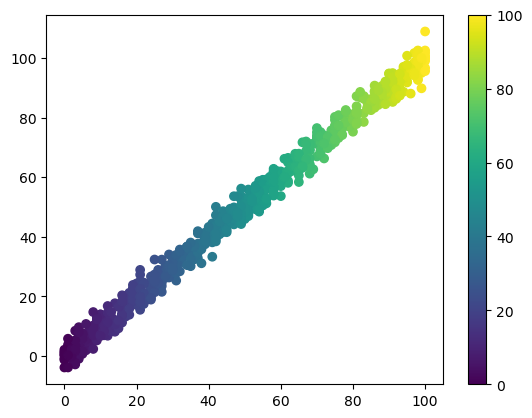

In [25]:
# Plot the X points in one color and the Y points in another color
# to see the difference between the two
plt.scatter(dataset['x'], dataset['y'], c=dataset['x'], cmap='viridis')
plt.colorbar()
plt.show()


In [26]:
columns = dataset.columns
columns

Index(['x', 'y'], dtype='object')

In [27]:
X_full = dataset.x.to_numpy()
y_full = dataset.y.to_numpy()

In [28]:
X_train, X_val, y_train, y_val = dataset_splitter(X_full, y_full, 0.4)
X_val, y_val, X_test, y_test = dataset_splitter(X_val, y_val, 0.5)

X type: <class 'numpy.ndarray'>
y type: <class 'numpy.ndarray'>
X type: <class 'numpy.ndarray'>
y type: <class 'numpy.ndarray'>
train_size: 60.0% - test_size: 40.0%
X_train: 60%
X_val: 40%
X type: <class 'numpy.ndarray'>
y type: <class 'numpy.ndarray'>
X type: <class 'numpy.ndarray'>
y type: <class 'numpy.ndarray'>
train_size: 50.0% - test_size: 50.0%
X_train: 50%
X_val: 50%


In [29]:
print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)
print(X_train[:4])
print(y_train[:4])

(419,) (419,)
(140,) (140,)
[29. 58. 84. 76.]
[29.6673599  56.68718792 85.02778957 73.13850045]


In [37]:
# Normalizing the data
#X_train = normalize(X_train)
print(X_train[:4])
print(y_train[:4])

[0.29 0.58 0.84 0.76]
[29.6673599  56.68718792 85.02778957 73.13850045]


In [38]:
gradient_step = compute_gradient(X_train, y_train, 0, 0)
gradient_step

(-33.71367200482022, -50.08042798444155)

In [39]:
-0.010278216047499015 / 420

-2.447194297023575e-05

In [46]:
# X_train = np.array([1.0, 2.0, 1.5])  # features
# y_train = np.array([300.0, 500.0, 250.0])  # target value
# initialize parameters
w_init = 1
b_init = 1
# some gradient descent settings
iterations = 10000
tmp_alpha = 1.0e-2
# run gradient descent
w_final, b_final, J_history, p_history = gradient_descent(
    X_train,
    y_train,
    w_init,
    b_init,
    tmp_alpha,
    iterations,
    compute_cost,
    compute_gradient)
print(f"(w,b) found by gradient descent: ({w_final},{b_final})")

Iteration    0: Cost 1.57e+03  dj_dw: -3.287e+01, dj_db: -4.858e+01   w:  1.329e+00, b: 1.48578e+00
Iteration 1000: Cost 7.06e+01  dj_dw: -2.647e+00, dj_db:  1.425e+00   w:  6.066e+01, b: 2.10548e+01
Iteration 2000: Cost 2.12e+01  dj_dw: -1.345e+00, dj_db:  7.241e-01   w:  7.988e+01, b: 1.07055e+01
Iteration 3000: Cost 8.43e+00  dj_dw: -6.834e-01, dj_db:  3.679e-01   w:  8.965e+01, b: 5.44649e+00
Iteration 4000: Cost 5.13e+00  dj_dw: -3.473e-01, dj_db:  1.870e-01   w:  9.461e+01, b: 2.77413e+00
Iteration 5000: Cost 4.28e+00  dj_dw: -1.765e-01, dj_db:  9.501e-02   w:  9.713e+01, b: 1.41618e+00
Iteration 6000: Cost 4.06e+00  dj_dw: -8.967e-02, dj_db:  4.828e-02   w:  9.842e+01, b: 7.26141e-01
Iteration 7000: Cost 4.00e+00  dj_dw: -4.556e-02, dj_db:  2.453e-02   w:  9.907e+01, b: 3.75501e-01
Iteration 8000: Cost 3.99e+00  dj_dw: -2.315e-02, dj_db:  1.247e-02   w:  9.940e+01, b: 1.97324e-01
Iteration 9000: Cost 3.99e+00  dj_dw: -1.177e-02, dj_db:  6.335e-03   w:  9.957e+01, b: 1.06785e-01


In [47]:
y_pred = compute_model_output(X_train, w_final, b_final)
print(y_pred[:4])
# y_val_norm = normalize(y_train)
print(y_train[:4])
# W[0]:99.6508769209906 - b 0.060809317925982466
# [28.95956363 57.85831793 83.76754593 75.79547578]
# [29.6673599  56.68718792 85.02778957 73.13850045]

W[0]:99.6508769209906 - b 0.060809317925982466
[28.95956363 57.85831793 83.76754593 75.79547578]
[29.6673599  56.68718792 85.02778957 73.13850045]


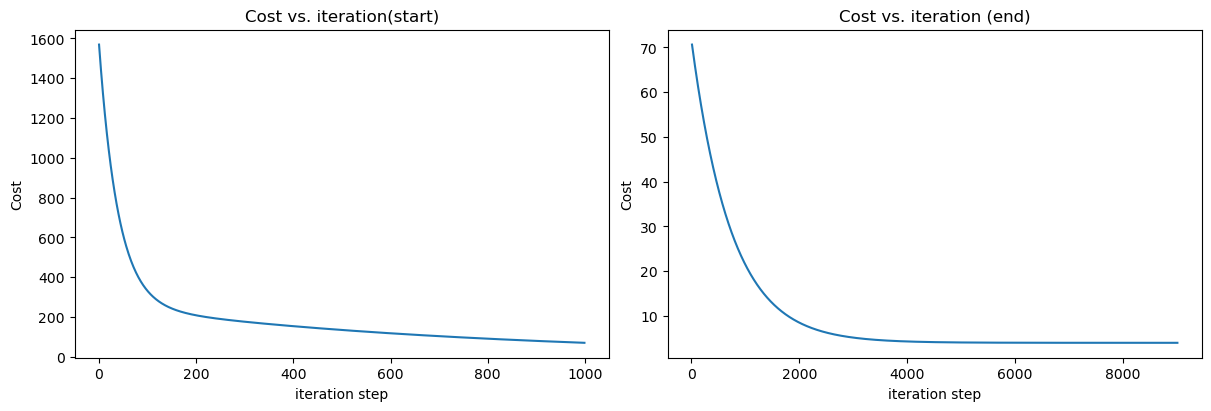

In [48]:
# plot cost versus iteration
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12, 4))
ax1.plot(J_history[:1000])
ax2.plot(10 + np.arange(len(J_history[1000:])), J_history[1000:])
ax1.set_title("Cost vs. iteration(start)")
ax2.set_title("Cost vs. iteration (end)")
ax1.set_ylabel('Cost')
ax2.set_ylabel('Cost')
ax1.set_xlabel('iteration step')
ax2.set_xlabel('iteration step')
plt.show()